<a href="https://colab.research.google.com/github/sandhyakp/Website-User-Behavior-Traffic-Analysis/blob/main/website_traffic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv("data-export (1).csv")

In [30]:
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [31]:
####(( DATA CLEANING ))####


In [32]:
# Step 1: Set first row (index 0) as column headers
df.columns = df.iloc[0]

# Step 2: Drop the first row (since it's now used as header)
df = df.drop(index=0)

# Step 3: Reset index to start from 0 (drop old index)
df = df.reset_index(drop=True)


#Step 5: Changing the column names
df.columns = ['Channel Group',
       'DateHour', 'Users', 'Sessions', 'Engaged sessions',
       'Average engagement time per session', 'Engaged sessions per user',
       'Events per session', 'Engagement rate', 'Event count']

# Step 4: Display the cleaned DataFrame
df.head()

,Channel Group,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [33]:
# data cleaning Operations (formatting datatypes checking data present in columns are valid o consistent


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Channel Group                        3182 non-null   object
 1   DateHour                             3182 non-null   object
 2   Users                                3182 non-null   object
 3   Sessions                             3182 non-null   object
 4   Engaged sessions                     3182 non-null   object
 5   Average engagement time per session  3182 non-null   object
 6   Engaged sessions per user            3182 non-null   object
 7   Events per session                   3182 non-null   object
 8   Engagement rate                      3182 non-null   object
 9   Event count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


In [34]:
df['DateHour'] = pd.to_datetime(df['DateHour'], format='%Y%m%d%H',errors='coerce')

''' so here i basically extracting all the columns then dropping only first two one need to be object second one is in date format and all left columns going to
be converted as numeric columns hence apply function is used here if any values unable to convert as an numeric column in that case handle it by paramter like
errors='coerce' these it will basically return N/A if any column is unable to convert'''

numeric_columns = df.columns.drop(['Channel Group', 'DateHour'])
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Channel Group                        3182 non-null   object        
 1   DateHour                             3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
dtypes: datetime6

In [36]:
df.head()

,Channel Group,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001


In [37]:
# To analyse the Traffic Timings or hour-wise on website new column is introduced

df['Hour'] = df['DateHour'].dt.hour

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Channel Group                        3182 non-null   object        
 1   DateHour                             3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  Hour        

In [39]:
df.describe()

,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


##obj 1: session and user over time

*   datehour
*   users  
*   sessions columns






In [40]:
sns.set(style='darkgrid')

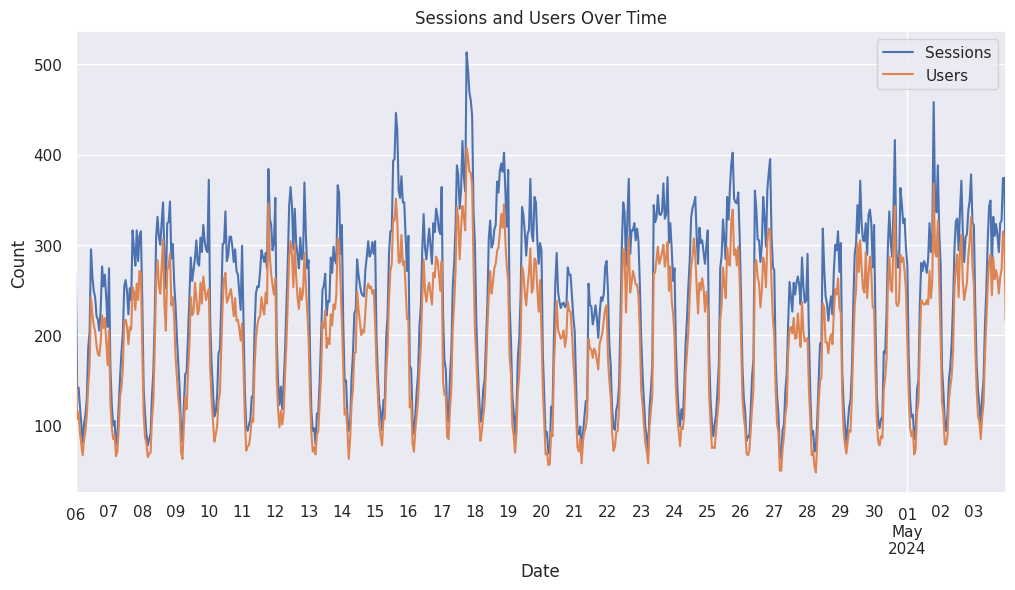

In [41]:
df.groupby("DateHour")[["Sessions","Users"]].sum().plot(figsize=(12,6))
plt.title("Sessions and Users Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

### 📈 Insights:
- Sessions consistently increase between 6 PM to 9 PM every day.
- Number of users is slightly lower than sessions, indicating repeat visits.
- Weekly pattern shows higher traffic on weekends.
- Need to explore why some dates (like April 17) have traffic spikes — maybe due to campaigns?

## Total Users by Channel

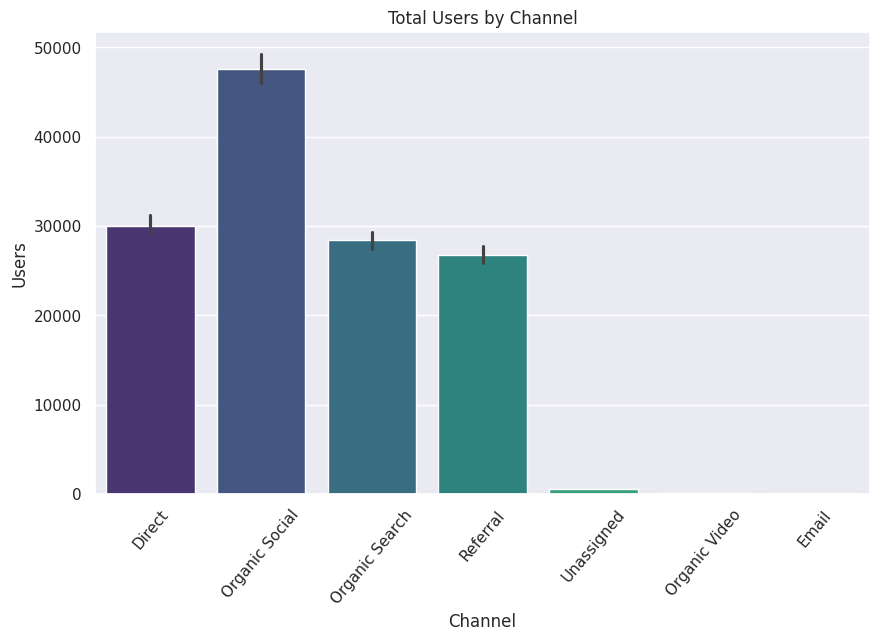

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Channel Group', y='Users', hue="Channel Group",estimator=np.sum, data=df ,palette="viridis",legend=False)
plt.title('Total Users by Channel')
plt.xlabel('Channel')
plt.ylabel('Users')
plt.xticks(rotation=50)
plt.show()

## Average Engagement Time by Channel

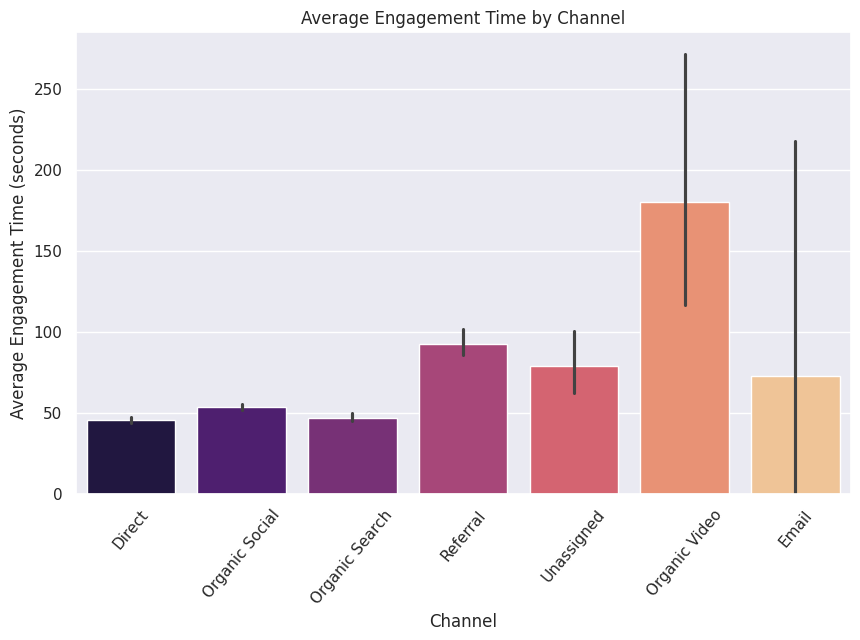

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Channel Group', y='Average engagement time per session', hue="Channel Group",estimator=np.mean, data=df ,palette="magma",legend=False)
plt.title('Average Engagement Time by Channel')
plt.xlabel('Channel')
plt.ylabel('Average Engagement Time (seconds)')
plt.xticks(rotation=50)
plt.show()

## Engagment Rate Distrubution by Channel

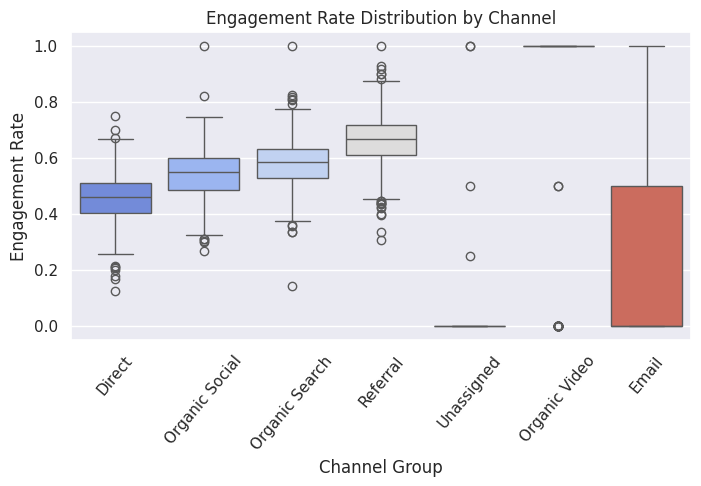

In [50]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, y='Engagement rate', x='Channel Group', hue='Channel Group', palette="coolwarm", legend=False)
plt.title('Engagement Rate Distribution by Channel')
plt.xticks(rotation=50)
plt.ylabel('Engagement Rate')
plt.xlabel('Channel Group')
plt.show()

##Engaged vs Non-Engaged Sessons

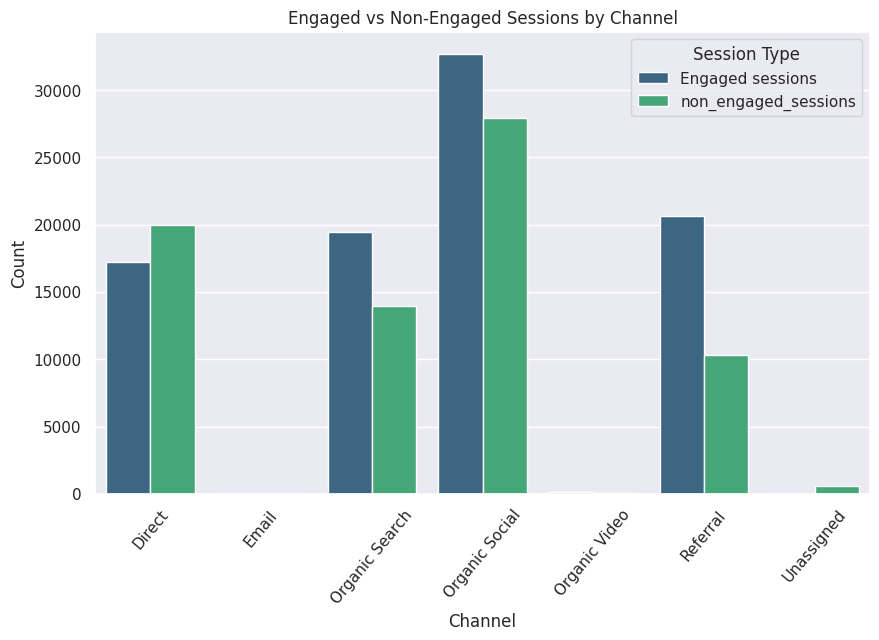

In [45]:
session_df = df.groupby('Channel Group')[['Sessions', 'Engaged sessions']].sum().reset_index()
session_df['non_engaged_sessions'] = session_df['Sessions'] - session_df['Engaged sessions']
session_df_melted = session_df.melt(id_vars=['Channel Group'], value_vars=['Engaged sessions', 'non_engaged_sessions'], var_name='Session Type', value_name='Count')
plt.figure(figsize=(10, 6))
sns.barplot(data=session_df_melted, x='Channel Group', y='Count', hue='Session Type', palette="viridis")
plt.title('Engaged vs Non-Engaged Sessions by Channel')
plt.xticks(rotation=50)
plt.xlabel('Channel')
plt.ylabel('Count')
plt.show()

## Traffic by Hour and Channel

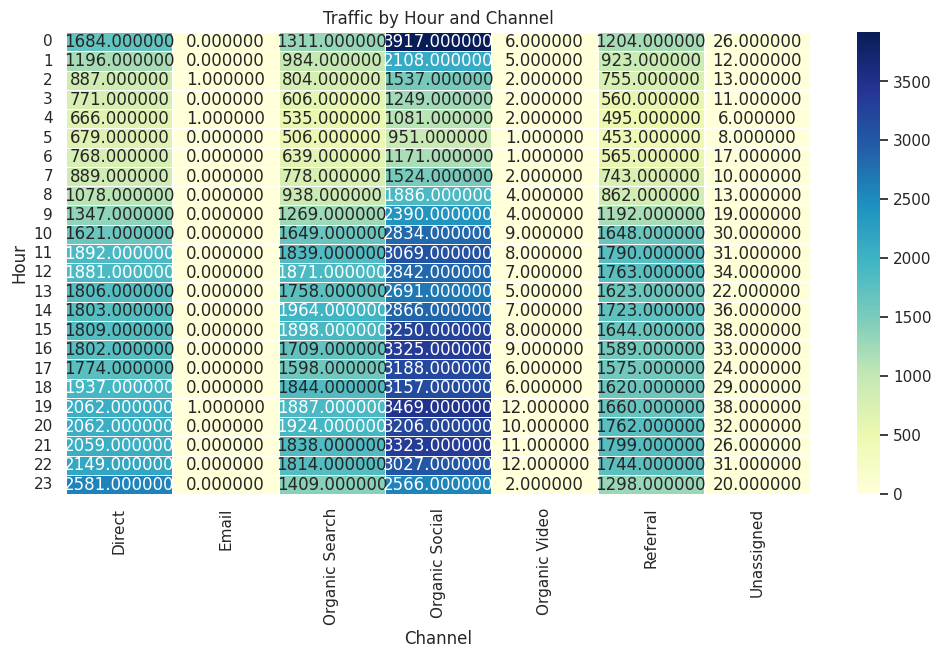

In [46]:
heatmap_df = df.groupby(['Hour', 'Channel Group'])['Sessions'].sum().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_df, cmap='YlGnBu' ,linewidths=.5, annot=True, fmt='0f')
plt.title('Traffic by Hour and Channel')
plt.xlabel('Channel')
plt.ylabel('Hour')
plt.show()

## Engagment Rate vs Sessions Over Time

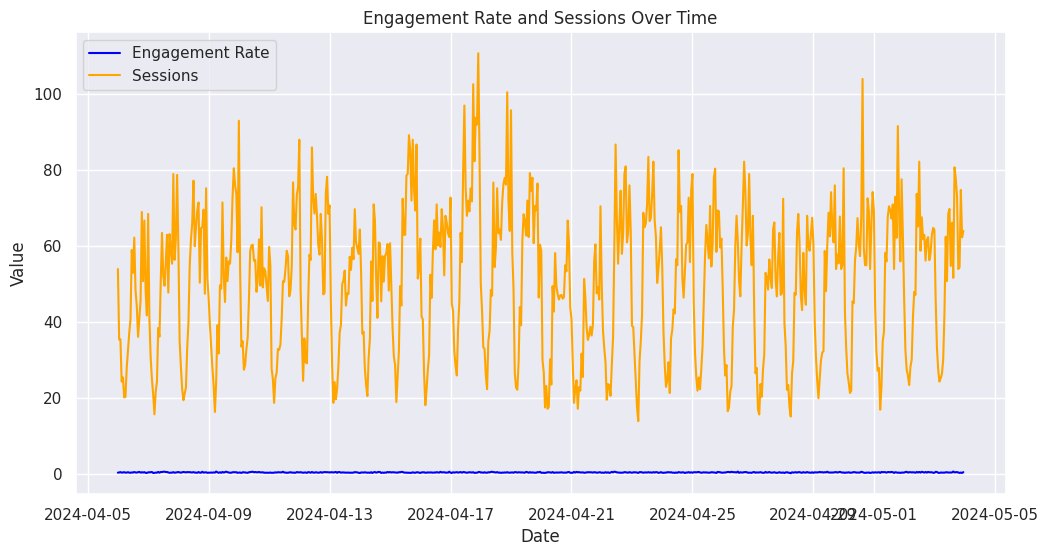

In [47]:
df_plot = df.groupby('DateHour')[['Engagement rate', 'Sessions']].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(df_plot['DateHour'], df_plot['Engagement rate'], label='Engagement Rate', color='blue')
plt.plot(df_plot['DateHour'], df_plot['Sessions'], label='Sessions', color='orange')
plt.title('Engagement Rate and Sessions Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()